## vgg16迁移学习训练数据EnglishFnt
***题目：使用卷积神经元网络CNN，对多种字体的26个大写英文字母进行识别。
<br>数据集介绍：</br>
<br>1- 数据集来源于Chars74K dataset，本项目选用数据集EnglishFnt中的一部分。Chars74K dataset网址链接 http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/</br>
<br>2- A-Z共26种英文字母，每种字母对应一个文件夹（Sample011对应字母A, Sample012对应字母B,…, Sample036对应字母Z）；</br>
<br>3- Sample011到Sample036每个文件夹下相同字母不同字体的图片约1000张，PNG格式</br>***


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torchvision
from torchsummary import  summary
from torchvision.models import vgg16
from sklearn.model_selection import train_test_split
# import pandas as pd 
import os 

device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### 读取数据

In [2]:
pic_1=plt.imread('./project2/Sample011/img011-00002.png')
pic_1

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

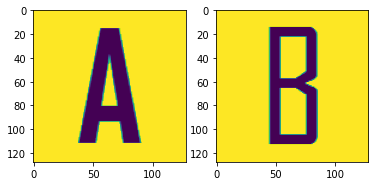

In [3]:
pic_2=plt.imread('./project2/Sample012/img012-00001.png')
fig,[ax1,ax2]=plt.subplots(1,2)
ax1.imshow(pic_1)
ax2.imshow(pic_2)

### 查看vgg16的模型细节

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg16=vgg16(pretrained=True)  #第一次需要下载一段时间
    def forward(self,input):
        output=self.vgg16(input)
        return output

In [5]:
model=Net()
summary(model=model,input_size=[(3,224,224)],batch_size=32,device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 64, 224, 224]           1,792
              ReLU-2         [32, 64, 224, 224]               0
            Conv2d-3         [32, 64, 224, 224]          36,928
              ReLU-4         [32, 64, 224, 224]               0
         MaxPool2d-5         [32, 64, 112, 112]               0
            Conv2d-6        [32, 128, 112, 112]          73,856
              ReLU-7        [32, 128, 112, 112]               0
            Conv2d-8        [32, 128, 112, 112]         147,584
              ReLU-9        [32, 128, 112, 112]               0
        MaxPool2d-10          [32, 128, 56, 56]               0
           Conv2d-11          [32, 256, 56, 56]         295,168
             ReLU-12          [32, 256, 56, 56]               0
           Conv2d-13          [32, 256, 56, 56]         590,080
             ReLU-14          [32, 256,

In [6]:
vgg16=vgg16(pretrained=True)

#### 卷积层

In [11]:
vgg16.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

#### 全连接层(也是我们修改的地方)

In [12]:
vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

#### vgg16所有的参数

In [13]:
i=0
for param in vgg16.parameters():
    i=i+1
    print(i,param.shape)

1 torch.Size([64, 3, 3, 3])
2 torch.Size([64])
3 torch.Size([64, 64, 3, 3])
4 torch.Size([64])
5 torch.Size([128, 64, 3, 3])
6 torch.Size([128])
7 torch.Size([128, 128, 3, 3])
8 torch.Size([128])
9 torch.Size([256, 128, 3, 3])
10 torch.Size([256])
11 torch.Size([256, 256, 3, 3])
12 torch.Size([256])
13 torch.Size([256, 256, 3, 3])
14 torch.Size([256])
15 torch.Size([512, 256, 3, 3])
16 torch.Size([512])
17 torch.Size([512, 512, 3, 3])
18 torch.Size([512])
19 torch.Size([512, 512, 3, 3])
20 torch.Size([512])
21 torch.Size([512, 512, 3, 3])
22 torch.Size([512])
23 torch.Size([512, 512, 3, 3])
24 torch.Size([512])
25 torch.Size([512, 512, 3, 3])
26 torch.Size([512])
27 torch.Size([4096, 25088])
28 torch.Size([4096])
29 torch.Size([4096, 4096])
30 torch.Size([4096])
31 torch.Size([1000, 4096])
32 torch.Size([1000])


###### EnglishFnt字母案例 的单通道 vgg16的第一层为Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) 通道为3 这里需要修改

In [10]:
vgg16.features[0]

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [11]:
vgg16.features[0].parameters()

<generator object Module.parameters at 0x00000236F2A9ED68>

### 重构vgg16模型

In [4]:
class vgg16_EnglishFnt(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg16 = vgg16(pretrained=True)  # 第一次运行需要下载一段时间
        # 构造自己的全连接 来替换vgg16的全连接层
        my_classifier = nn.Sequential(
            nn.Linear(in_features=25088, out_features=200, bias=True),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=200, out_features=26)
        )
        # 替换全连接层
        self.vgg16.classifier = my_classifier
        # EnglishFnt字母案例 的单通道 vgg16的第一层通道为3 这里需要修改为1
        self.vgg16.features[0] = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        # 先冻结vgg16卷积层的所有参数
        for param in self.vgg16.parameters():
            param.requires_grad = False
        # 更新卷积层的某几层
        for i in [1,2,3]:
            for param in self.vgg16.features[i].parameters():
                param.requires_grad=True

        # 更新全连接层
        for param in self.vgg16.classifier.parameters():
            param.requires_grad = True

    def forward(self, input):
        output = self.vgg16(input)
        return output


In [5]:
summary(vgg16_EnglishFnt(),input_size=[(1,128,128)],batch_size=32,device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 64, 128, 128]             640
              ReLU-2         [32, 64, 128, 128]               0
            Conv2d-3         [32, 64, 128, 128]          36,928
              ReLU-4         [32, 64, 128, 128]               0
         MaxPool2d-5           [32, 64, 64, 64]               0
            Conv2d-6          [32, 128, 64, 64]          73,856
              ReLU-7          [32, 128, 64, 64]               0
            Conv2d-8          [32, 128, 64, 64]         147,584
              ReLU-9          [32, 128, 64, 64]               0
        MaxPool2d-10          [32, 128, 32, 32]               0
           Conv2d-11          [32, 256, 32, 32]         295,168
             ReLU-12          [32, 256, 32, 32]               0
           Conv2d-13          [32, 256, 32, 32]         590,080
             ReLU-14          [32, 256,

### 数据集划分

In [6]:
path='./project2/'
batch_size=16
transforms=torchvision.transforms.Compose([
    torchvision.transforms.Grayscale(1),  #把通道改为1
    torchvision.transforms.ToTensor()
])
data_set=torchvision.datasets.ImageFolder(path,transform=transforms)
# 数据集划分
train_data,test_data=train_test_split(data_set,random_state=666,shuffle=True,test_size=0.2)
train_data_loader=torch.utils.data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_data_loader=torch.utils.data.DataLoader(dataset=test_data,batch_size=batch_size,shuffle=True)

In [7]:
print(len(data_set))
print(len(train_data_loader))
print(len(test_data_loader))

26416
1321
331


In [8]:
def test(data_loader,model):
    sum = 0
    for index, (input, target) in enumerate(data_loader):
        # GPU
        input = input.to(device)
        target = target.to(device)
        output = model(input)
        y = torch.max(output, dim=1)[1]
        sum += (y == target).sum()
    acc = sum/len(data_loader)/batch_size
#     print("acc:", acc.item())
    return acc.item()

In [9]:
model=vgg16_EnglishFnt().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
crossEntropyLoss=nn.CrossEntropyLoss() 
#模型加载
if os.path.exists('./EnglishFnt_vgg_model/model.pkl'):
    model.load_state_dict(torch.load('./EnglishFnt_vgg_model/model.pkl'))
    optimizer.load_state_dict(torch.load('./EnglishFnt_vgg_model/optimizer.pkl'))

def train(epoch,data_loader):
    loss_list=[]
    acc_list=[]
    for index,(input,target) in enumerate(data_loader):
        #GPU
        input=input.to(device)
        target=target.to(device)
        output=model(input)
        loss=crossEntropyLoss(output,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #模型保存
        if index %100==0:
            acc=test(test_data_loader,model)
            print("epoch:{} loss:{:.4f} acc:{:.4f}[{}/{}]".format(epoch+1,loss.item(),acc,index*batch_size,len(data_set)))
            loss_list.append(loss.item())
            acc_list.append(acc)

    torch.save(model.state_dict(),'./EnglishFnt_vgg_model/model.pkl')
    torch.save(optimizer.state_dict(),'./EnglishFnt_vgg_model/optimizer.pkl')
    
    return loss_list ,acc_list

### 训练模型

In [10]:
%%time
loss_list=[]
acc_list=[]
for i in range(3):
    loss,acc=train(i,train_data_loader)
    loss_list.extend(loss)
    acc_list.extend(acc)

epoch:1 loss:3.6869 acc:0.0770[0/26416]
epoch:1 loss:0.7578 acc:0.6577[1600/26416]
epoch:1 loss:1.0696 acc:0.7764[3200/26416]
epoch:1 loss:1.0017 acc:0.8021[4800/26416]
epoch:1 loss:0.9106 acc:0.8285[6400/26416]
epoch:1 loss:0.5106 acc:0.8308[8000/26416]
epoch:1 loss:0.1570 acc:0.8448[9600/26416]
epoch:1 loss:0.0860 acc:0.8469[11200/26416]
epoch:1 loss:0.4386 acc:0.8393[12800/26416]
epoch:1 loss:0.2940 acc:0.8610[14400/26416]
epoch:1 loss:0.1209 acc:0.8527[16000/26416]
epoch:1 loss:0.2875 acc:0.8661[17600/26416]
epoch:1 loss:0.6353 acc:0.8674[19200/26416]
epoch:1 loss:0.1130 acc:0.8631[20800/26416]
epoch:2 loss:0.5511 acc:0.8650[0/26416]
epoch:2 loss:0.0290 acc:0.8646[1600/26416]
epoch:2 loss:0.8289 acc:0.8616[3200/26416]
epoch:2 loss:1.2761 acc:0.8710[4800/26416]
epoch:2 loss:0.4326 acc:0.8690[6400/26416]
epoch:2 loss:0.1362 acc:0.8780[8000/26416]
epoch:2 loss:0.5508 acc:0.8697[9600/26416]
epoch:2 loss:0.1451 acc:0.8733[11200/26416]
epoch:2 loss:0.0228 acc:0.8824[12800/26416]
epoch:2 

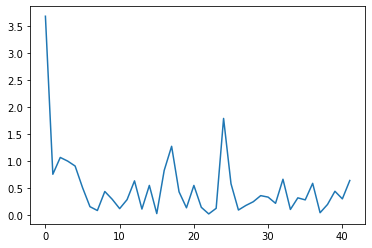

In [11]:
plt.plot(loss_list)

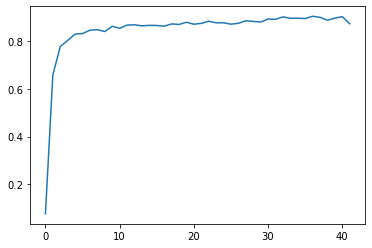

In [12]:
plt.plot(acc_list)

In [14]:
def test_all(data_loader):
    model=vgg16_EnglishFnt().to(device)
    optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
    
    if os.path.exists('./EnglishFnt_vgg_model/model.pkl'):
        model.load_state_dict(torch.load('./EnglishFnt_vgg_model/model.pkl'))
        optimizer.load_state_dict(torch.load('./EnglishFnt_vgg_model/optimizer.pkl'))
    
    sum = 0
    for index, (input, target) in enumerate(data_loader):
        # GPU
        input = input.to(device)
        target = target.to(device)
        output = model(input)
        y = torch.max(output, dim=1)[1]
        sum += (y == target).sum()
    acc = sum/len(data_loader)/batch_size
    print("acc:", acc.item())
    return acc.item()

In [15]:
test_all(test_data_loader)

acc: 0.8906722068786621


0.8906722068786621

In [ ]:
model = vgg16_EnglishFnt().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
crossEntropyLoss = nn.CrossEntropyLoss()
acc_list=test_all(train_data_loader) 